
## MNIST using Tensorflow Eager execution


TensorFlow's eager execution is a new addition to Google's TensorFlow framework. TensorFlow is a widely used framework for training and deploying deep learning models. Many topics covered in this tutorial are from the official TensorFlow website itself, I have tried to add a few points here and there that I found along the way as I adapted to the nuance of the framework. Additionally, you will discover that Eager execution is contentious since, for now, it trades speed for convenience. TensorFlow claims it will be fixing this soon.  For some, this tutorial might be handy and for others, it might be a rehash of the TensorFlow documentation; hence I have tried to add links to the source material where ever I could to make it worth your while. 

Previously, TensorFlow utilized a graph approach to constructing deep learning models where a network graph had to be coded up and a session had to be created and run. While the session mode in TensorFlow provides well-optimized tools the eager mode is more suited for quick prototyping. We will be using TensorFlow 2.0 below for all the examples. The eager execution mode is available from TensorFlow 1.7+.



In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

# checking the version of tensorflow
print(tf.__version__) 


# In TensorFlow 2.0 this is the way
# to activate eager execution mode
# and ONLY this way. 
tf.executing_eagerly()

 

2.0.0


True

In [2]:
# check if code is using gpu 
tf.debugging.set_log_device_placement(True)

# suppose we want to print a variable
dummy = tf.Variable([[1.0]])
dummy_numpy = dummy[0].numpy()

print(dummy)
print(" \n {} ".format(dummy_numpy))


Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StridedSlice in device /job:localhost/replica:0/task:0/device:GPU:0
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.]], dtype=float32)>
 
 [1.] 


The first line helps in checking which device TensorFlow is using to execute your code. In our case, we have wanted to ensure that it will use a local GPU to perform the calculations hence we placed the line below identify which device was used.

```python 
# check if code is using gpu 
tf.debugging.set_log_device_placement(True)

```

The result was 
```python 
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0

```
As you can see,  GPU:0 was used hence we can be sure that the GPU was used for computation.

If you want to force TensorFlow to use a certain device, it is possible to do so using 

```python

with tf.device("CPU:0"):

```
In the above code, any code within the with statement will be executed by the CPU device rather than the GPU device. 

Now onto the core difference. In TensorFlow's graph mode statements like 

```python
dummy = tf.Variable([[1.0]])
print(dummy)
```
would not be possible. One would require a session.run() command to execute the above statement. Eager execution makes it easy to output the value of the tensor and more over it allows us to convert a tensor to a numpy value and tensor values to numpy values. 

Take for example

```python 
dummy_np = np.array([10])
tensor = tf.multiply(dummy_np, 2)
print("Value of tensor {} \ntype of tensor {}" .format(tensor, type(tensor))) 

```




In [3]:
# execute the code below to see the result 

dummy_np = np.array([10])
tensor = tf.multiply(dummy_np, 2)
print("Value of tensor {} \ntype of tensor {}" .format(tensor, type(tensor))) 

Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Value of tensor [20] 
type of tensor <class 'tensorflow.python.framework.ops.EagerTensor'>


##  Taking gradients 

One really cool feature of TensorFlow eager is taking gradients. It is covered [here](https://www.tensorflow.org/tutorials/customization/autodiff) in the documentation. I will give a couple of examples here. 

Suppose you want to take gradients of a function, as you will have to do for backpropagation. You can use the gradient tape method. Let us define the problem as - 

$$ f(x) = x^3 $$
what is the derivative of this function at $x=2$. The way to do this is 

In [4]:
# define the variable and value
x = tf.Variable([[2.0]])

# record the function 
with tf.GradientTape() as tape: 
    function = x*x*x

# take the derivative at the given value
gradient_value = tape.gradient(function, x)

#print derivative value 
print("Value of function at x=2 is {}".format(gradient_value.numpy()[0][0]))


Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddN in device /job:localhost/replica:0/task:0/device:GPU:0
Value of function at x=2 is 12.0


In line 2 we define a TensorFlow variable and set it's value. We then encompass the function in the gradient tape method. Next, we take the gradient with respect to the x variable. ```python gradient_value ``` holds a eager tensor that contains the the value of the derivative at $x=2$. We covert it to a numpy array and display it in the last step. 

Using this we method we can do things like chain rule which is a crucial technique used in backpropagation. 

Suppose we define a problem- 

$$ f(z) = \dfrac{1}{1+ e^{-z}} $$

where
$$ z=  x + x^2 + x^3$$

So if we want to take the derivative with respect to $x$ at $x=2$



In [5]:
# define the variable and value
x = tf.Variable([[2.0]])

# record the function 
with tf.GradientTape() as tape: 
    tape.watch(x)
    z =  x + tf.pow(x,2) + tf.pow(x,3)
    e_term =  -tf.exp(z)
    function = 1.0/(1+e_term)
                    
# take the derivative at the given value
delf_delx = tape.gradient(function, x)
print("delf/delx at x=2 is {}".format(delf_delx[0][0]))


Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Pow in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Exp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Neg in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RealDiv in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BroadcastGradientArgs in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sum in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
delf/delx at x=2 is 1.4136010577203706e-05


We used numpy equivalent functions that are defined for tensorflow like power and exponent to write the function. Pretty cool. It is also possible to take higher order derivatives, all we need to do is run another tape over the existing one.


In [6]:
# define the variable and value
x = tf.Variable([[2.0]])

# record the function 
with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape: 
        tape.watch(x)
        z =  x + tf.pow(x,2) + tf.pow(x,3)
        e_term =  -tf.exp(z)
        function = 1.0/(1+e_term)
                    
# take the derivative at the given value
    delf_delx = tape.gradient(function, x)
second_order_derivative  =  tape2.gradient(delf_delx, x)

print("delf/delx at x=2 is {}".format(delf_delx[0][0]))
print("delf2/del2x at x=2 is {}".format(second_order_derivative[0][0]))


Executing op Tile in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddN in device /job:localhost/replica:0/task:0/device:GPU:0
delf/delx at x=2 is 1.4136010577203706e-05
delf2/del2x at x=2 is -0.0002286711533088237


## Eager execution MNIST example

Coding up MNIST is somewhat different from the graph method of TensorFlow. If you are unaware of what the MNIST dataset is, take a look at info about it [here](https://en.wikipedia.org/wiki/MNIST_database). 

First we need to download the dataset and access the data. The code in this section is from [this](https://www.tensorflow.org/tutorials/quickstart/advanced) section of the tensorflow tutorial. 



In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test =  x_test / 255.0

print("training set shape {}".format(x_train.shape))

training set shape (60000, 28, 28)


We import the training and the testing set and divide it by 255 to ensure that the pixel values lie in between 0 and 1. 
We need to add a new channel dimension to define it as a tensor since we want the shape to of the form (28,28,1) for each image

In [8]:
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("training set shape {}".format(x_train.shape))

training set shape (60000, 28, 28, 1)


Next, we need to create shuffle and batch our training set and batch our test set. TensorFlow gives us a nice utility function for this. Dataset module contains the shuffle and batch option. For instance 

In [9]:
shuffled_batched = tf.data.Dataset.range(10).shuffle(5,seed=1 ).batch(2)
for values in shuffled_batched: 
    print(values)
    

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op LogicalAnd in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Select in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AnonymousRandomSeedGenerator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNextSync in device /job:localhost/replica:0/task:0/device:CPU:0
tf.T

We batched and shuffled numbers from 1 to 10 . Just make sure that you shuffle first, batch later.   You can set the seed value to ensure that the shuffle order is the same always, especially when you are prototyping. Similarly, we will shuffle and batch the training set and batch the test set.  

In [10]:
# shuffle and batch the training set
batch_size = 32 
num_images = 50000

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(num_images).batch(batch_size)


# batch the test set 
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)


Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShuffleDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0


 ### Define a model
 Next we define the model. We import dense, flatten and convolutional layers from keras and the model utlilty from keras as well. The model is defined below
 

In [11]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu',padding='same' )
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(10, activation='softmax')
        self.conv1_save = []
        
    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        return self.d2(x)

# Create an instance of the model
model = MyModel()

In the model, we have the init method that contains the initialized layered. Super allows us to access the Keras Model class. The call function lets us define the structure of the network. The current network is a 2d convolutional network followed by a 128 node dense layer and 10 node softmax layer, which provides the output for the model. 
The last line is where we create an instance of the class MyModel().

Here is a diagram of the network. 
![nn](neural_network.jpg)

The network takes in an 28 X 28 image and outputs probabilities for each digit class.
### Loss and optimizer 

Next, we create a loss object and an optimizer object. We use a sparse categorical cross entropy object which allows us to use labels without one hot encoding. 


In [12]:
# loss function 
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

# adam optimizer
optimizer = tf.keras.optimizers.Adam()


### Define metrics 
Next we define the metrics used for evaluation. Since, we are using sparse categorical entropy as loss, Tensorflow provides the sparse categorical accuracy metric which calculates the accuracy without having to worry about converting the labels from one hot encoding to integer values. 

In [13]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0


### Training and testing step functions 
Next, we have the training step and test step function.  You will notice the ```python @tf.function``` decorator on top of the train and test step functions. The decorator converts the Eager mode model to a graph and executes the function. The "apply gradients" method calculates the gradient and backpropagates it through the network.


In [14]:


@tf.function
def train_step(images, labels):

    with tf.GradientTape() as tape:
    
        predictions = model(images, training=True)
        loss = loss_object(labels, predictions)
    
    # apply gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    # calculate training loss 
    train_loss(loss)
    train_accuracy(labels, predictions)
    
@tf.function
def test_step(images, labels):
  
    predictions = model(images, training=False)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)



### Training loop 
We train the network for 10 epochs. In the below cell, we have the code from the TensorFlow tutorial, where we first reset the metrics at the beginning of every epoch and then we run the training and testing steps and print the output. The code is fairly self-explanatory. Once we finish training the model, we want to make predictions with it. 

In [15]:
EPOCHS = 5

for epoch in range(EPOCHS):
    # reset metrics for train set
    train_loss.reset_states()
    train_accuracy.reset_states()
    
    # rest metrics for test set
    test_loss.reset_states()
    test_accuracy.reset_states()

    # run training step
    for images, labels in train_ds:
        train_step(images, labels)
    
    # run test set 
    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    # print the epoch number, loss and various metrics
    template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
    print(template.format(epoch+1,
                            train_loss.result(),
                            train_accuracy.result()*100,
                            test_loss.result(),
                            test_accuracy.result()*100))

Executing op OptimizeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op IteratorGetNextSync in device /job:localhost/replica:0/task:0/device:CPU:0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

### Infer on single image

 To predict the label of a single image take the image and convert it to a tensor and pass it to the model. It will yield softmax values, since we have 10 possible outcomes, we take the index of the maximum value of the softmax output. This is the predicted label. Below you can see that in two cases the predicted and actual labels are the same. 
 

Executing op Cast in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Conv2D in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op BiasAdd in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Relu in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Softmax in device /job:localhost/replica:0/task:0/device:GPU:0
predicted value 6, actual label 6


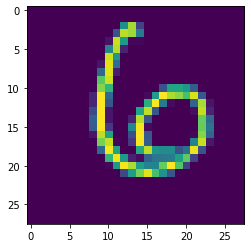

In [16]:
# choose a test set image 
test_image = tf.convert_to_tensor(x_test[100][ tf.newaxis, ...])

# get softmax values from the model 
softmax_value = model(test_image).numpy()

# get predicted label
predicted_label = np.argmax(softmax_value)

# get actual label
actual_label = y_test[100]
print("predicted value {}, actual label {}".format(predicted_label, actual_label))

# plot test image
plt.imshow(x_test[100].reshape(28,28))
plt.show()

predicted value 3, actual label 3


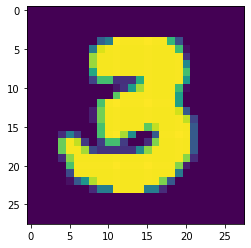

In [17]:
# choose a test set image 
test_image = tf.convert_to_tensor(x_test[200][ tf.newaxis, ...])

# get softmax values from the model 
softmax_value = model(test_image).numpy()

# get predicted label
predicted_label = np.argmax(softmax_value)

# get actual label
actual_label = y_test[200]
print("predicted value {}, actual label {}".format(predicted_label, actual_label))

# plot test image
plt.imshow(x_test[200].reshape(28,28))
plt.show()

### Get weights in the network 


Suppose you are interested in getting weights for each layer. We can identify each layer in the following way- 

In [18]:
# model weights 
model_weights = [x.numpy() for x  in model.weights]



There are 6 arrays in the model_weights list - 

1) 0 th array  32 filters, 3 X 3 size.  <br>
2) 32  size array bias vector <br>
3) 25088 X 128 size matrix. Weights between flatten and 128 unit dense layer. <br> 
4) 128 size array bias vector. <br>
5) 128 by 10 size matrix. Weights between 128 unit dense and 10 unit dense layer. <br> 
6) 10 size bias vector. <br>



![neural_weight](neural_weights_2.jpg)


In the image above, the objects in the orange brackets are matrix multiplied together to yield the object to the right side of the arrow. We matrix multiply the test image and the first set of filters to get  32 feature maps of 28 X 28 size. We add a 32 element bias vector to these feature maps and run a Relu activation function to get the layer activations. The feature maps form a multidimensional matrix which flattens to 25088 elements (28 X 28 X 32 = 25088). The next set of brackets involves the product of the flattened layer and a weight matrix of size 25088 X 128 which converts the 25088 weight vector to a 128 element array, to this we add the 128 term bias vector. Again, we run the Relu activation function on this array to get the activations for the 128 nodes dense layer. The final bracket is the product of the 128 nodes dense layer and a 128 x 10  size weight matrix. This yields a 10 element array to which we add the 10 element bias vector and run it through the Softmax function to get class probabilities for each digit.         

In the code below, the relu_conv layer is converted from float 64 to float 32 to perform the matrix multiplication of the convolutional layer with the weights. 


In [19]:
# convolution to flattened layer  
convolution_result = tf.nn.convolution(test_image, model_weights[0], padding="SAME")  + model_weights[1]
flattened_conv = tf.reshape(tf.nn.relu(convolution_result),[-1])

# flatten layer 28*28*32 = 25088
relu_conv = tf.reshape(flattened_conv,[1,25088])
relu_conv_float32 = tf.cast(relu_conv,"float32")

# flattened layer to dense 1 
weights_product_1 = tf.linalg.matmul(relu_conv_float32, model_weights[2]) + model_weights[3]
dense1 = tf.nn.relu(weights_product_1)

#dense 1 to dense 2 
weights_product_2 = tf.linalg.matmul(dense1, model_weights[4]) +  model_weights[5]
dense2 = tf.nn.softmax(weights_product_2)


print(dense2)
print(model(test_image))

Executing op Conv2D in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Relu in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:GPU:0
tf.Tensor(
[[1.32804705e-11 5.82186914e-13 1.01545972e-08 9.99960780e-01
  3.15947823e-11 3.91779577e-05 2.73543476e-13 5.41391476e-13
  1.72385644e-08 6.33513297e-10]], shape=(1, 10), dtype=float32)
tf.Tensor(
[[1.3280496e-11 5.8218805e-13 1.0154617e-08 9.9996078e-01 3.1594841e-11
  3.9178038e-05 2.7354399e-13 5.4139148e-13 1.7238596e-08 6.3351452e-10]], shape=(1, 10), dtype=float32)


You can see that both results are the same. This means that our set of operations is the same as what the model object does. One might wonder why we are doing this? A benefit is that we can calculate the output of intermediate layers; for example, we can find the value of the convolutional feature maps and plot them. Hence, extracting weights is extremely useful for us. 

Another useful takeaway from this exercise is we now know that a neural network is really nothing more than a sequence of matrix multiplication. Once we had the weights, we could have easily converted the image to a NumPy array and carried out a series of matrix multiplications and acquired a prediction. We chose to use TensorFlow for running inference since it allows us to run inference with 1 line of code model(test_image). Regardless of the framework, be it TensorFlow, Pytorch, MXnet, Chainer, etc. fundamentally, we are performing a set of matrix operations to get a prediction. If we understand the fundamental ideas, then we do not have to be married to a framework. 


## Saving and loading model

I found that using saved_model.save and load gave me better results for saving and loading models. So below is an example of this. 

In [20]:
tf.saved_model.save(model, "test_model" )


Executing op __inference_initialize_variables_23263 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_initialize_variables_23278 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_initialize_variables_23289 in device /job:localhost/replica:0/task:0/device:GPU:0

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Executing op __inference_initialize_variables_23306 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op __inference_initialize_variables_23315 in device /job:localhost/rep

In [21]:
tf.saved_model.load("test_model")

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RestoreV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RestoreV2 in device /job:localhost/replica:0/task:0/device:CPU:0


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x1b12ed2e488>

## Conclusion

In this article, we have covered some of the bare minimum basics of Eager execution in TensorFlow. There are a lot more functionalities that Eager mode has that we have not covered, and the TensorFlow documentation includes most of them. However, in my personal experience, how the documentation states and how things work usually tends to differ a little bit. Either way, its a good starting place to learn.

Finally, TensorFlow absorbed Keras as of TensorFlow 2.0. Keras is a high-level framework for deep learning and is pretty easy to use. We will have some tutorials with Keras soon so keep an eye out for those as well.
